# Pima Indians Diabetes 피마 인디언스 당뇨병 예측하기
### 문제 | 당뇨병 여부를 분류하는 분류 문제

### 머신러닝 알고리즘 활용 과정
[0. 데이터 훑어보기](#0.-데이터-훑어보기)

[1. 전처리(Feature Engineering)](#1.-전처리(Feature-Engineering))
- 결측치 처리/ 라벨 인코딩 / column 제거

[2. 탐색적 데이터 분석](#2.-탐색적-데이터-분석)
- seaborn- 플롯들로 분석

[3. 모델 학습](#3.-모델-학습)
- 분류기 모델 설정 / gridsearchcv로 하이퍼파라미터별 최적 분류기 구하기

[4. 성능 평가](#4.-성능-평가)
- 성능 평가지표를 구해서 비교

[5. 결론 및 참조](#5.-결론-및-참조)


### Attribute Information(변수 정보)

|변수명|설명|
|---|---|
|Pregnancies| Number of times pregnant(임신 횟수)|
|Glucose| Plasma glucose concentration a 2 hours in an oral glucose tolerance test (혈장 포도당 농도)|
|BloodPressure| Diastolic blood pressure (mm Hg) (혈압)|
|SkinThickness| Triceps skin fold thickness (mm) (피부 두께)|
|Insulin| Body mass index (weight in kg/(height in m)^2) |
|BMI| Body mass index (weight in kg/(height in m)^2)  (체질량 지수)|
|DiavetesPredigreeFunction| Diabetes pedigree function (당뇨병 혈통 기능)|
|Age| Age (years) (나이)|
|Outcome| Class variable (0 or 1) 268 of 768 are 1, the others are 0|

# 0. 데이터 훑어보기

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [92]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> null 값이 없고, 데이터형이 모두 int/float형이므로 1단계에서 이상치만 확인해보면 될듯.

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> DiabetesPedigreeFunction과 Age열을 제외하고는 모두 min값이 0인 것을 확인.\
> Pregnancies를 제외하고는 데이터가 0일 수 없는 열들이므로 **결측치**로 여겨도 될듯함.

### 시작 전, 정리
> 1. matplotlib 라이브러리
> - **범주형**의 자료 그래프 : 막대 그래프(plt.plot), 파이 차트(plt.pie)
> - **연속형**의 자료 그래프 : 선 그래프(plt.plot), 히스토그램(plt.hist)
> - **범주형(x)과 연속형(y)**의 자료 그래프 : 박스플롯(plt.boxplot, 요약통계량 제공, 분포의 대칭성, 이상치 쉽게 파악 가능)
>
> - **연속형과 연속형**의 자료 그래프 : 산점도(plt.scatter, 상관관계 파악 용이)
> 2. seaborn 라이브러리 (matplotlib 기반 + 스타일 지정이 자유로운 고급통계 그래프)
>- **연속형**의 자료 그래프 : sns.distplot : plt.hist와 kdeplot(커널밀도함수)를 통합하여, 분포와 밀도 확인 가능한 함수
>
>- **연속형과 연속형**의 자료 그래프 : 
>  1. sns.regplot : col, hue 옵션이 없는 x와 y축으로 구성. (lmplot과 비슷)
>  2. sns.lmplot (회귀선+산점도, col(색상 구분), hue로 범주형 추가하여 카테고리별 데이터분포의 선형관계 표시가능) but, 실제 회귀식 나타내지 못함.\
>    옵션- ci:1~100사이. 회귀추정의 신뢰구간 표현. 
>        -  robust: 이상치의 영향 제거 
>        -  order: 회귀선의 차원 변경
>  3. sns.jointplot : 두 변수간의 상관관계(산점도)와 각 변수의 분포(histogram)를 동시에 보여줌. 기본형은 scatterplot, kind옵션
>    - "reg" : 회귀선(regression) 표시
>    - "hex" : 육각 그래프 
>    - "kde" : 커널 밀집 그래프 (등고선). 각 변수는 커널밀도 함수변수는 커널밀도 함수(sns.kdeplot)
>  4. 다차원-sns.pairplot : 3차원 이상의 데이터(데이터프레임)일 경우, 각 데이터 열들의 조합 Grid형태로 표시-산점도 / 같은 열의 조합-histogram.
>    - hue 이용해서 범주형변수 섞일 경우, 산점도:범주별 색깔 지정됨.   
>    - histogram=>kde로 변경되어 각 범주별 kde표시됨
>  5. 연속형 변수들의 상관 분석 : heatmap
>
>- **범주형(x)과 연속형(y)**의 자료 그래프 : 박스플롯(sns.boxplot), violinplot, 막대 그래프
>  - violinplot : boxplot과 비슷하지만, 분포의 전체적인 형상 직관적으로 볼 수 있음. 이상치 표기는 X. (커널 밀도 히스토그램을 세로로 한 것)
>    hue를 이용해서 추가 구분 범주 가능. (범주형에 대해 violinplot이 쪼개져서 생성) hue의 nunique=2라면 'split=True' 옵션 이용하여 (쪼개지않고) 한 violinplot에 표현 가능.
>  - 막대 그래프(1차원)\
>    a.회귀 : sns.barplot - x에 종류별 y에 대한 평균, y에 연속형 변수 (+신뢰구간을 나타내는 표시)\
>    b.분류 : sns.countplot - x의 종류별 count 개수
>
>- **범주형과 범주형**의 자료 그래프 : 피벗테이블-2차원비교


### 여러개의 plot 그리기
1. 겹쳐 그리기 : plt.show()하기 전 여러개의 그래프를 넣으면 됨.(for 구문 이용)
2. 나란히 배치하기 - **Subplot** : fig 내에 여러 ax 객체 만들어서 각각의 Axes에 개별적인 plot(boxplot, countplot 등등) 생성 가능
- 편한방법 : fig, ax = plt.subplot**s**(nrows=2, ncols=2) # 총 2행 2열 생성가능.
3. 나란히 배치하기 - **FacetGrid** : 범주형 변수의 조합으로 그래프를 나누어 그릴 수 있음. *'연속형(x)과 연속형(y)' 그래프를 한 범주형 변수(hue)에 대해 나누어 볼 때 좋음.*
- 사용 예시 : scatterplot에서 hue를 지정할 때 FacetGrid에서 적용한다.\
  sns.scatterplot(x="연속형", y="연속형", hue="범주형", data=DF) \
  이것 대신에\
  grid = sns.FacetGrid(data=DF,col="범주형", hue="범주형", col_wrap= 한 행에 몇개 의 열 표시할지 옵션)\
  grid.map(sns.scatterplot(그래프 종류), "연속형(x)", "연속형(y)")

# 1. 전처리(Feature Engineering)
- 각 열의 결측치는 없었으나, 값이 0인 행들이 있는 것 같으니 확인.-> 결측치 처리
- 이상치 처리

In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# '0'이 의미있는 값일 수 있는 'Pregnancies'는 제외.
print('Glucose의 loss data 갯수: {0}'.format(len(data.loc[data.Glucose == 0])))
print('BloodPressure의 loss data 갯수: {0}'.format(len(data.loc[data.BloodPressure == 0])))
print('SkinThickness의 loss data 갯수: {0}'.format(len(data.loc[data.SkinThickness == 0])))
print('Insulin의 loss data 갯수: {0}'.format(len(data.loc[data.Insulin == 0])))
print('BMI의 loss data 갯수: {0}'.format(len(data.loc[data.BMI == 0])))
print('DiabetesPedigreeFunction의 loss data 갯수: {0}'.format(len(data.loc[data.DiabetesPedigreeFunction == 0])))
print('Age의 loss data 갯수: {0}'.format(len(data.loc[data.Age == 0])))

Glucose의 loss data 갯수: 5
BloodPressure의 loss data 갯수: 35
SkinThickness의 loss data 갯수: 227
Insulin의 loss data 갯수: 374
BMI의 loss data 갯수: 11
DiabetesPedigreeFunction의 loss data 갯수: 0
Age의 loss data 갯수: 0


> Glucose, BloodPressure, SkinThickness, Insulin, BMI의 0값을 결측치로 생각하고 처리해야함.

##### 결측치 처리
- 평균보다는 median값(중앙값)으로 대체
- 0인 값들을 None으로 처리한 후, None값을 없앤 dataset의 median값을 None자리에 대체.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

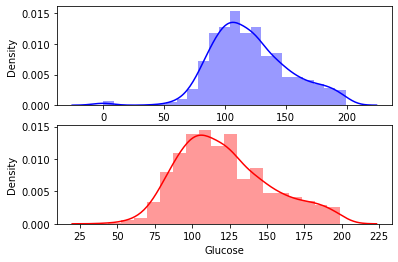

In [93]:
# 0인 값을 None으로 대체
# 1. Glucose
glu0 = data.replace({'Glucose':0}, {'Glucose':None})
glu = glu0.dropna()
glu = glu.fillna(glu.Glucose.median())

# 데이터 분포 확인
figure, ax = plt.subplots(2)
sns.distplot(data['Glucose'], ax=ax[0], color='blue') # 대체 전
sns.distplot(glu['Glucose'], ax=ax[1], color='red') # 대체 후
plt.show()

- 대체 후(빨간색)에 0값이 사라진 것 확인 가능.

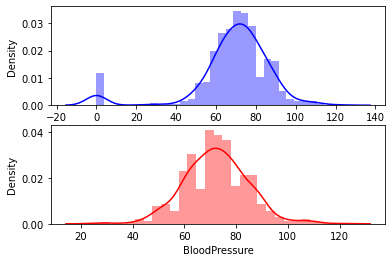

In [94]:
data = glu
# 2. BloodPressure
bp0 = data.replace({'BloodPressure':0}, {'BloodPressure':None})
bp = bp0.dropna()
bp = bp.fillna(bp.BloodPressure.median())

# 데이터 분포 확인
figure, ax = plt.subplots(2)
sns.distplot(data['BloodPressure'], ax=ax[0], color='blue') # 대체 전
sns.distplot(bp['BloodPressure'], ax=ax[1], color='red') # 대체 후
plt.show()

- 대체 후(빨간색)에 0값 사라진 것 확인 가능.

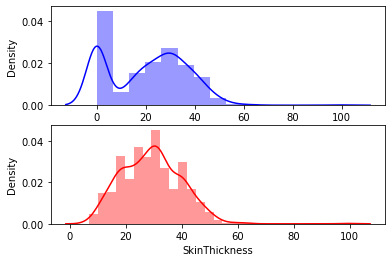

In [95]:
data = bp
# 3. SkinThickness
st0 = data.replace({'SkinThickness':0}, {'SkinThickness':None})
st = st0.dropna()
st = st.fillna(st.SkinThickness.median())

# 데이터 분포 확인
figure, ax = plt.subplots(2)
sns.distplot(data['SkinThickness'], ax=ax[0], color='blue') # 대체 전
sns.distplot(st['SkinThickness'], ax=ax[1], color='red') # 대체 후
plt.show()

- 대체 후(빨간색)에 0값 사라진 것 확인.

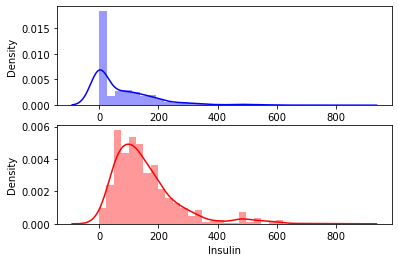

In [96]:
data = st
# 4. Insulin
insul0 = data.replace({'Insulin':0}, {'Insulin':None})
insul = insul0.dropna()
insul = insul.fillna(insul.Insulin.median())

# 데이터 분포 확인
figure, ax = plt.subplots(2)
sns.distplot(data['Insulin'], ax=ax[0], color='blue') # 대체 전
sns.distplot(insul['Insulin'], ax=ax[1], color='red') # 대체 후
plt.show()

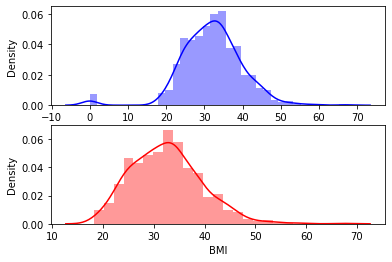

In [97]:
data = insul
# 5. BMI
bmi0 = data.replace({'BMI':0}, {'BMI':None})
bmi = bmi0.dropna()
bmi = bmi.fillna(bmi.BMI.median())

# 데이터 분포 확인
figure, ax = plt.subplots(2)
sns.distplot(data['BMI'], ax=ax[0], color='blue') # 대체 전
sns.distplot(bmi['BMI'], ax=ax[1], color='red') # 대체 후
plt.show()

- 대체 후(빨간색)에 0값 사라진 것 확인.

In [16]:
data = bmi
print('Glucose의 loss data 갯수: {0}'.format(len(data.loc[data.Glucose == 0])))
print('BloodPressure의 loss data 갯수: {0}'.format(len(data.loc[data.BloodPressure == 0])))
print('SkinThickness의 loss data 갯수: {0}'.format(len(data.loc[data.SkinThickness == 0])))
print('Insulin의 loss data 갯수: {0}'.format(len(data.loc[data.Insulin == 0])))
print('BMI의 loss data 갯수: {0}'.format(len(data.loc[data.BMI == 0])))
print('DiabetesPedigreeFunction의 loss data 갯수: {0}'.format(len(data.loc[data.DiabetesPedigreeFunction == 0])))
print('Age의 loss data 갯수: {0}'.format(len(data.loc[data.Age == 0])))

Glucose의 loss data 갯수: 0
BloodPressure의 loss data 갯수: 0
SkinThickness의 loss data 갯수: 0
Insulin의 loss data 갯수: 3
BMI의 loss data 갯수: 0
DiabetesPedigreeFunction의 loss data 갯수: 0
Age의 loss data 갯수: 0


In [17]:
data.loc[data.Insulin == 0] # 0,1,2 인덱스가 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,29,0,23.3,0.672,32,1


#### 이상치 확인 (boxplot 이용)
- 데이터 갯수가 많지 않기 때문에 **제거보다는 대체**를 해보자.
- 평균치로 대체하는 것보다는 (이상치의 영향을 받을 수 있기 때문) 중앙값으로 대체.
  - 이상치를 제외한 평균치로 넣어도 괜찮을듯하다.
- IQR = Q3-Q1 (Interquartile Range, 사분위수 범위)
  - Q1과 Q3은 quantile()을 이용한다. Q1(1사분위수)은 0.25, Q3(3사분위수)은 0.75이다.
- Box Plot을 이용하여 각 feature의 outlier들을 detecting 해보자.

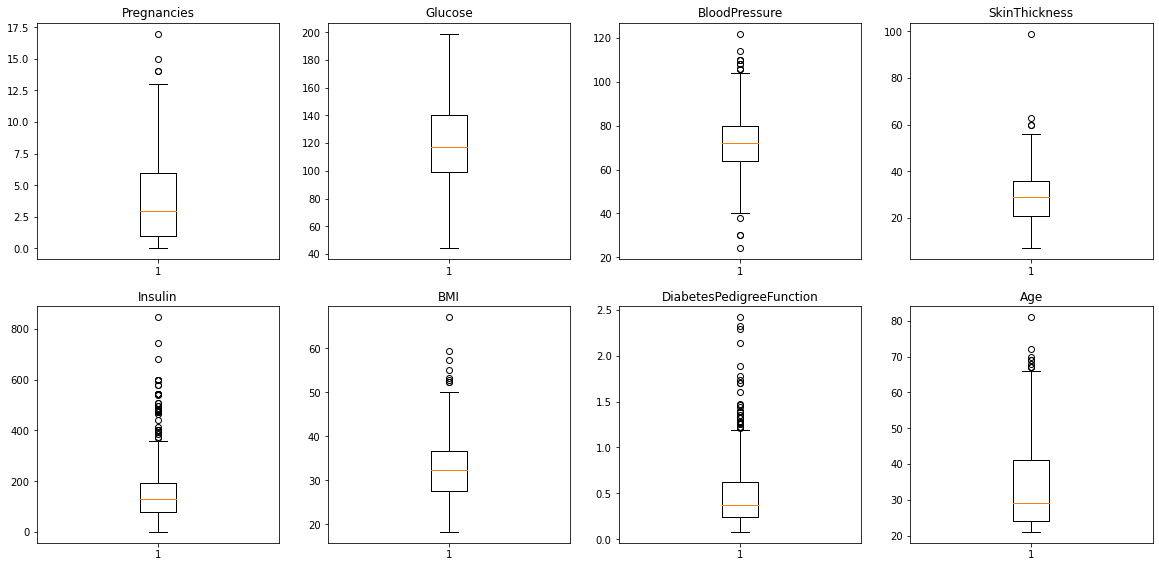

In [19]:
plt.figure( figsize=(20,20) )

plt.subplot(441)
plt.title('Pregnancies')
plt.boxplot(data['Pregnancies'])

plt.subplot(442)
plt.title('Glucose')
plt.boxplot(data['Glucose'])

plt.subplot(443)
plt.title('BloodPressure')
plt.boxplot(data['BloodPressure'])

plt.subplot(444)
plt.title('SkinThickness')
plt.boxplot(data['SkinThickness'])

plt.subplot(445)
plt.title('Insulin')
plt.boxplot(data['Insulin'])

plt.subplot(446)
plt.title('BMI')
plt.boxplot(data['BMI'])

plt.subplot(447)
plt.title('DiabetesPedigreeFunction')
plt.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(448)
plt.title('Age')
plt.boxplot(data['Age'])

plt.show()

<AxesSubplot:xlabel='Pregnancies'>

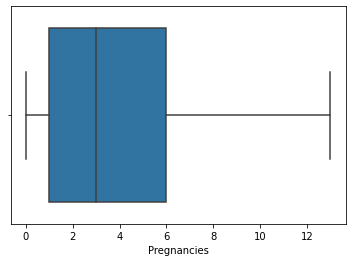

In [62]:
### 1. pregnancy
q1 = data.Pregnancies.quantile(0.25)
q3 = data.Pregnancies.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
med = np.median(data.Pregnancies)

for i in data.Pregnancies:
    if i > upper or i < lower :
        data.Pregnancies = data.Pregnancies.replace(i, med)

# 이상치 대체 후 boxplot 확인
sns.boxplot(data.Pregnancies)

<AxesSubplot:xlabel='Glucose'>

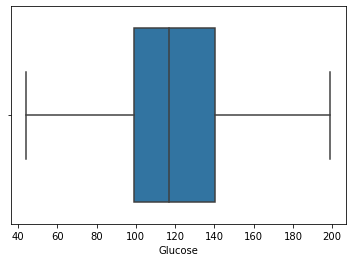

In [63]:
### 2. Glucose
q1 = data.Glucose.quantile(0.25)
q3 = data.Glucose.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
med = np.median(data.Glucose)

for i in data.Glucose:
    if i > upper or i < lower :
        data.Glucose = data.Glucose.replace(i, med)

# 이상치 대체 후 boxplot 확인
sns.boxplot(data.Glucose)

<AxesSubplot:xlabel='BloodPressure'>

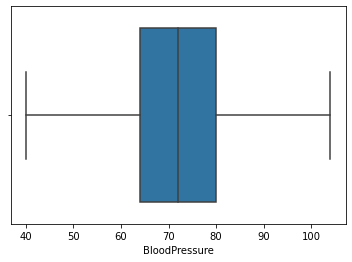

In [64]:
### 1. BloodPressure
q1 = data.BloodPressure.quantile(0.25)
q3 = data.BloodPressure.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
med = np.median(data.BloodPressure)

for i in data.BloodPressure:
    if i > upper or i < lower :
        data.BloodPressure = data.BloodPressure.replace(i, med)

# 이상치 대체 후 boxplot 확인
sns.boxplot(data.BloodPressure)

<AxesSubplot:xlabel='SkinThickness'>

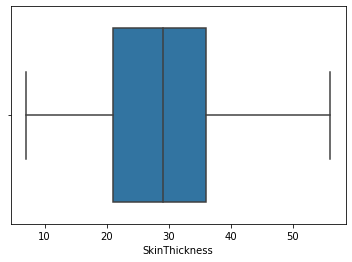

In [65]:
### 1. Skin Thickness
q1 = data.SkinThickness.quantile(0.25)
q3 = data.SkinThickness.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
med = np.median(data.SkinThickness)

for i in data.SkinThickness:
    if i > upper or i < lower :
        data.SkinThickness = data.SkinThickness.replace(i, med)

# 이상치 대체 후 boxplot 확인
sns.boxplot(data.SkinThickness)

<AxesSubplot:xlabel='Insulin'>

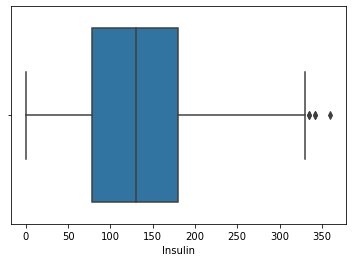

In [66]:
### 1. Insulin
q1 = data.Insulin.quantile(0.25)
q3 = data.Insulin.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
med = np.median(data.Insulin)

for i in data.Insulin:
    if i > upper or i < lower :
        data.Insulin = data.Insulin.replace(i, med)

# 이상치 대체 후 boxplot 확인
sns.boxplot(data.Insulin)

<AxesSubplot:xlabel='Insulin'>

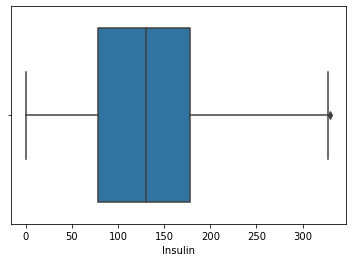

In [67]:
### 1. BMI
q1 = data.Insulin.quantile(0.25)
q3 = data.Insulin.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
med = np.median(data.Insulin)

for i in data.Insulin:
    if i > upper or i < lower :
        data.Insulin = data.Insulin.replace(i, med)

# 이상치 대체 후 boxplot 확인
sns.boxplot(data.Insulin)

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

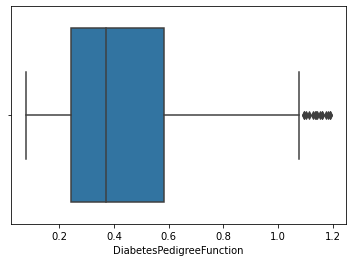

In [68]:
### 1. DiabetesPedigreeFunction
q1 = data.DiabetesPedigreeFunction.quantile(0.25)
q3 = data.DiabetesPedigreeFunction.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
med = np.median(data.DiabetesPedigreeFunction)

for i in data.DiabetesPedigreeFunction:
    if i > upper or i < lower :
        data.DiabetesPedigreeFunction = data.DiabetesPedigreeFunction.replace(i, med)

# 이상치 대체 후 boxplot 확인
sns.boxplot(data.DiabetesPedigreeFunction)

<AxesSubplot:xlabel='Age'>

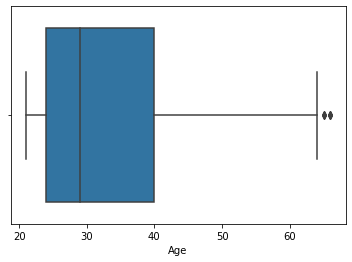

In [69]:
### 1. Age
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
med = np.median(data.Age)

for i in data.Age:
    if i > upper or i < lower :
        data.Age = data.Age.replace(i, med)

# 이상치 대체 후 boxplot 확인
sns.boxplot(data.Age)

In [76]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.514323,72.029948,29.041667,134.179688,32.482031,0.427667,32.760417,0.348958
std,3.270644,30.531191,11.181582,10.042197,70.764195,6.908600,0.245162,11.055385,0.476951
min,0.000000,44.000000,40.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,78.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.350000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,178.000000,36.725000,0.582250,40.000000,1.000000
max,13.000000,199.000000,104.000000,56.000000,330.000000,67.100000,1.191000,66.000000,1.000000


# 2. 탐색적 데이터 분석
- feature들은 모두 연속형 -> 상관관계 확인 가능. (heatmap, pairplot 이용)
- target은 범주형

> heatmap으로 상관관계 확인

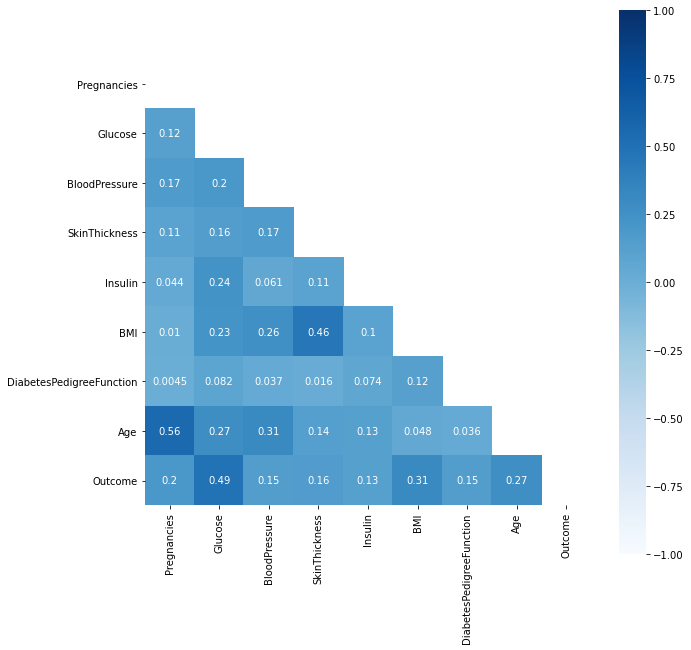

In [72]:
### Correlation matrix
corrmat = data.corr()
fig = plt.figure( figsize= (10,10) )

# 삼각형으로 출력
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

sns.heatmap( corrmat, vmax = 1, mask=mask, square = True, cmap="Blues", annot = True, vmin = -1 )
plt.show()

> 다차원이므로, pairplot (범주형을 hue로)

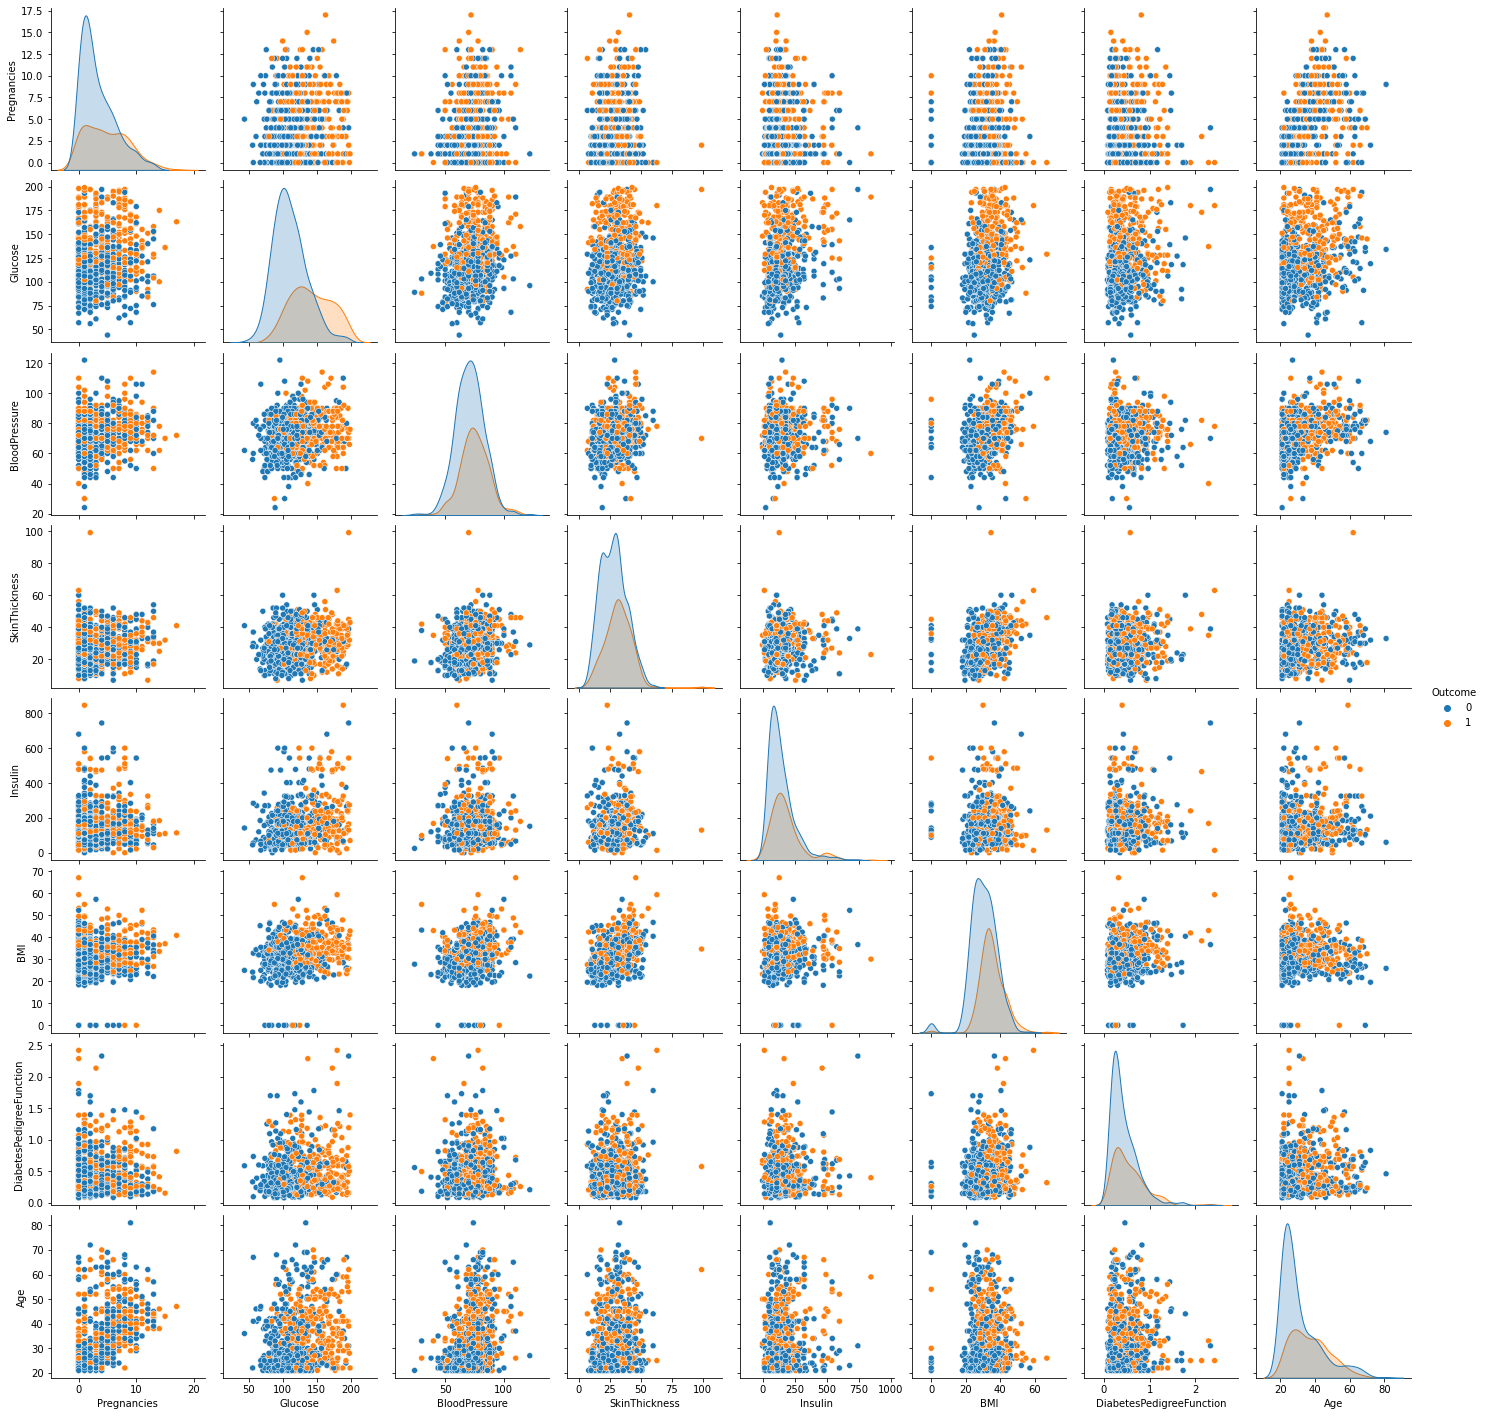

In [99]:
# 연속형 변수들 간의 상관관계
sns.pairplot(data, hue='Outcome')

# 3. 모델 학습
- 데이터 분할 (종속과 독립변수 분할 - test와 train 분할)
- feature scaling (정규화)

In [75]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.6270,50,1
1,1,85,66,29,0,26.6,0.3510,31,0
2,8,183,64,29,0,23.3,0.6720,32,1
3,1,89,66,23,94,28.1,0.1670,21,0
4,0,137,40,35,168,43.1,0.3725,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.1710,63,0
764,2,122,70,27,180,36.8,0.3400,27,0
765,5,121,72,23,112,26.2,0.2450,30,0
766,1,126,60,23,112,30.1,0.3490,47,1


In [77]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
display(X.head(2))
display(Y.head(2))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


0    1
1    0
Name: Outcome, dtype: int64

In [78]:
# test, train 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)
print(X_train.shape) # (614, 8)
print(X_test.shape) # (154, 8)

(614, 8)
(154, 8)


####  Feature Scaling (피처스케일링) 진행
- 각 컬럼별 데이터의 범위가 서로 다를 경우, 같은 수준의 범위로 맞춰주는 정규화 과정을 진행한다.

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
display(X_train)
display(X_test)

array([[ 2.72766337, -0.51660514, -0.19159616, ...,  0.23257528,
        -0.72184957,  1.73068888],
       [-0.86180327, -1.38846507,  0.25672718, ..., -0.08875303,
        -0.13238599, -0.98244211],
       [ 0.33468561,  0.25838146,  0.88437985, ...,  0.94826107,
         2.14416301,  0.37412338],
       ...,
       [ 0.03556339,  0.0323437 ,  0.70505052, ..., -0.08875303,
         0.05868152,  0.10281028],
       [-0.26355883, -0.29056738, -2.52287754, ..., -1.49091294,
        -1.1730941 , -0.98244211],
       [-0.56268105,  0.22609035,  1.42236786, ...,  0.86062607,
        -0.50639046,  0.73587418]])

array([[-0.56268105, -1.32388285, -1.08824285, ..., -0.71680382,
        -0.56330419, -0.71112901],
       [-0.86180327,  0.25838146, -0.19159616, ..., -0.9797088 ,
         0.17657424, -0.98244211],
       [-1.16092549, -0.48431403, -1.08824285, ..., -0.90667964,
        -1.20155096, -0.89200441],
       ...,
       [-1.16092549, -0.71035179,  1.42236786, ...,  2.07291016,
         2.16855461, -0.16850282],
       [ 0.33468561, -1.42075618, -2.16421886, ...,  0.15954612,
         0.91645266, -0.71112901],
       [ 0.03556339,  0.38754589, -0.01226683, ..., -1.28643128,
        -0.61615265,  2.45419048]])

# 4. 성능 평가
- 분류문제 이므로, 의사결정트리(DT), 로지스틱회귀분석, k-NN, 랜덤포레스트가 가능.

#### 1. 의사결정트리 - DecisionTreeClassifier()
- GridSearchCV (교차검증과 하이퍼파라미터 튜닝을 한번에)

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

dt_clf = DecisionTreeClassifier(random_state=156)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_samples_split':[2,3,4]
}

grid_search = GridSearchCV(dt_clf, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy') 

grid_search.fit(X_train, y_train)

print('최적의 파라미터 : ', grid_search.best_params_) 
print('best score : {0:.4f}'.format(grid_search.best_score_))

scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 
          'split3_test_score', 'split4_test_score']]

# 0.7622

최적의 파라미터 :  {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
best score : 0.7622


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762188,1,0.796748,0.723577,0.772358,0.772358,0.745902
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762188,1,0.796748,0.723577,0.772358,0.772358,0.745902
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762188,1,0.796748,0.723577,0.772358,0.772358,0.745902
3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.760562,4,0.788618,0.723577,0.772358,0.772358,0.745902
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.760562,4,0.788618,0.723577,0.772358,0.772358,0.745902
5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.760562,4,0.788618,0.723577,0.772358,0.772358,0.745902
6,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.752432,13,0.788618,0.723577,0.764228,0.739837,0.745902
7,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.752432,13,0.788618,0.723577,0.764228,0.739837,0.745902
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.752432,13,0.788618,0.723577,0.764228,0.739837,0.745902
9,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.703612,34,0.747967,0.691057,0.715447,0.642276,0.721311


#### 2. 랜덤포레스트 - RandomForestClassifier()
- GridSearchCV (교차검증과 하이퍼파라미터 튜닝을 한번에)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=156)

param_grid = {
    'n_estimators':[10,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split':[2,3,4,6,8],
    'min_samples_leaf':[8,12,18]
}

grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy') 
grid_search.fit(X_train, y_train)

print('GridSearch 최적의 파라미터 : ', grid_search.best_params_) 
print('GridSearch 최고 점수 : {0:.4f}'.format(grid_search.best_score_))
#0.7752

GridSearch 최적의 파라미터 :  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
GridSearch 최고 점수 : 0.7752


In [89]:
# GridSearchCV의 refit으로 학습된 estimator 반환
estimator = grid_search.best_estimator_

pred = estimator.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('test set에 대한 RandomForest 정확도 : {0:.4f}'.format(accuracy))
#0.7273
# 0.7143으로 떨어짐.

test set에 대한 RandomForest 정확도 : 0.7143


#### 3. k-NN (최근접 이웃 알고리즘)
- GridSearch 이용하여 모델 최적화

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN & gridsearchcv
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors':range(3,10)}]
grid_cv = GridSearchCV(knn, param_grid = param_grid, scoring='accuracy', cv=5)
grid_cv.fit(X_train,y_train)

# 학습 결과
print('GridSearch 최적의 파라미터 :', grid_cv.best_params_) 
print('GridSearch 최고 점수 : {0:.4f}'.format(grid_cv.best_score_))

# 최적화 파라미터 추출
model = grid_cv.best_estimator_
#0.7427

GridSearch 최적의 파라미터 : {'n_neighbors': 9}
GridSearch 최고 점수 : 0.7427


In [91]:
# 예측
y_pred = model.predict(X_test)

# test set 정확도 출력
print('test set에 대한 정확도 : {0:.2f}'.format(np.mean(y_pred == y_test)))

test set에 대한 정확도 : 0.74


# 5. 결론 및 참조
1. 이상치를 중앙값(median)으로 대체했더니 성능이 떨어짐.
  - 이상치를 제외한 평균값으로 대체해보고 확인할 필요 있음.
2. 의사결정나무(DT) 모델의 성능이 가장 높게 나옴. (0.7622)
  - 이외에도 **Logristic Regression, SVC, GaussainNB, BernoulliNB, ExtraTrees, AdaBoost, Gradient Boost, LightGBM,XGBoost** 등 다양한 모델로 성능을 확인해보고 싶음.
3. 정확도를 이용하여 성능 평가함.
  - ROC Curve, AUC CUrve, confusion_matrix, f1_score 등 다양한 성능 평가지표를 이용해보고 싶음.
  
##### 참고
- https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html
- 해당 캐글대회의 필사 (다양한 모델 이용됨)\
https://www.kaggle.com/siddheshera/pima-diabetes-with-eda-12-models-beginner
- https://philosopher-chan.tistory.com/672
- 분류의 성능 평가지표 (다양함)\
https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html